<a href="https://colab.research.google.com/github/Nazarht/python-for-ds/blob/main/HW1_%D0%A2%D0%B5%D1%81%D1%82%D1%83%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D1%81%D1%82%D0%B0%D1%82_%D0%B3%D1%96%D0%BF%D0%BE%D1%82%D0%B5%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
import seaborn as sns

В цьому ДЗ потренуємось виконувати Z-тести для тестування гіпотез в різних задачах. Для коректної імплементації та інтерпретації тестів рекоемндую переглянути спершу документацію:

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

### Завдання 1: Z-тест для однієї вибірки

**Мета**: Перевірити, чи середнє значення вибірки відрізняється від гіпотетичного середнього.

**Припущення**: Середній ріст студентів університету вважається 170 см. Ми хочемо перевірити, чи середній ріст випадкової вибірки студентів істотно більший. Вибірка задана в змінній `heights`.

Для виконання завдання імпортуйте метод для проведення `ztest`, виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення про середній зріст студентів на рівні значущості 0.05?

Використовуємо тут Z-тест, оскільки вибірка достатньо велика (більше 30 екземплярів) і можемо вважати, що її стандартне відхилення близьке до ст. відхилення генеральної сукупності, а значить - відоме.

In [2]:
heights = [174, 171, 175, 179, 170, 170, 179, 175, 169, 174, 169, 169, 173, 162, 163, 169, 166,
           173, 167, 164, 179, 170, 172, 164, 169, 175, 169, 174, 169, 169, 173, 162, 177]

In [7]:
meanH0 = 170
alpha = 0.05

ztest_Score, p_value = ztest(heights, value = meanH0, alternative='larger')

if(p_value <  alpha):
    print("Відхилити Н0.")
else:
    print("Н0 не може бути відхилена.")

Н0 не може бути відхилена.


In this case we have H0: the median is 170, and Ha: the median is higher value. Here we can see that H0 can not be rejected.

### Завдання 2: Z-тест для двох незалежних вибірок

**Завдання 2.1.**

**Мета**: Перевірити, чи існує статистична різниця між середніми оцінками двох груп студентів.

**Припущення**: Група A отримала новий навчальний курс, а група B продовжувала зі стандартним курсом. Ми перевіряємо, чи є новий курс ефективнішим.

Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення щодо студентів на рівні значущості 0.05?

In [8]:
group_a_scores = [78.55, 72.25, 79.88, 75.  , 76.54, 74.99, 87.26, 77.93, 72.71,
       82.11, 71.9 , 79.04, 68.2 , 71.36, 78.98, 81.69, 78.86, 77.42,
       76.49, 70.61, 74.4 , 75.7 , 83.29, 79.72, 69.18, 79.62, 76.07,
       74.62, 81.06, 83.15, 82.66, 73.8 , 76.45, 79.66, 82.88, 75.6 ,
       77.07, 72.47, 72.02, 82.06]

group_b_scores = [81.78, 74.64, 80.02, 76.81, 71.77, 76.81, 82.69, 74.82, 82.82,
       61.9 , 79.11, 75.44, 73.5 , 75.46, 65.06, 73.9 , 76.79, 82.39,
       72.41, 70.96, 72.49, 79.58, 76.64, 72.35, 77.57, 75.49, 79.84,
       71.49, 73.36, 73.04, 67.68, 76.48, 76.31, 75.03, 73.83, 67.92,
       72.9 , 73.29, 70.99, 74.19]

In [12]:
#H0 will be that there is no difference , Ha will be that there is some significant difference.
alpha = 0.05

ztest_Score, p_value = ztest(group_a_scores, group_b_scores,value = 0)

if(p_value <  alpha):
    print("Відхилити Н0.")
else:
    print("Н0 не може бути відхилена.")

print(alpha, p_value)

Відхилити Н0.
0.05 0.01840564855252801


Here we have two samples, and we are trying to see if
H0: Two groups marks are equal
Ha: Two groups marks are differnet

And we see that statisticly, two groups are most likely to be different.

**Завдання 2.2.**


**Мета**: Побачити, як впливає розмір вибірок на результат тесту.

**Завдання**: Уявіть, що з групи А ми маємо тільки перші 5 записів, а з групи В - усі. Таке могло статись, якщо ми вже маємо результати тестів учнів за попередньою програмою, а тести за новою програмою здали наразі лише 5 учнів і ми вирішили не чекати довше.
Виберіть перші 5 записів для групи А і проведіть такий самий тест як в Завданні 2.1. Виведіть значення p-value. Зробіть висновок, який результат ви бачите щодо стат. значущості на рівні 0.05 для цього експерименту?

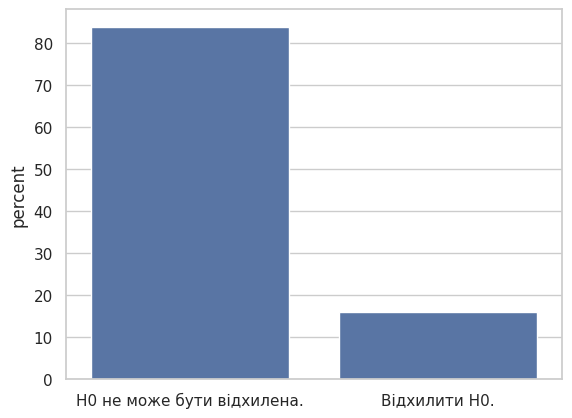

In [43]:
results = []

for i in range(50):
  randomA = np.random.choice(group_a_scores, 5)

  ztest_Score, p_value = ztest(randomA, group_b_scores,value = 0)

  results.append("Відхилити Н0." if p_value < alpha else "Н0 не може бути відхилена.")

sns.countplot(x=results, stat="percent")
plt.show()



Here the same test but for group a we have small random sample. And we see that 5 items sample is too small to see the diference, it is spoted in less than 20 percants.



### Завдання 3: Z-тест для двох пов'язаних вибірок

**Мета**: Перевірити, чи вплинув тренінг на продуктивність працівників.

**Припущення**: Всі працівники проходять однаковий тренінг, і ми хочемо з'ясувати, чи покращилися їхні показники після тренінгу на рівні значущості 0.05. Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи поліпшились показники працівників на рівні значущості 0.05?

In [37]:
before_training = [57.82, 37.63, 36.8 , 55.22, 52.97, 52.5 , 53.46, 43.2 , 52.32,
       52.93, 42.86, 68.66, 54.74, 38.09, 56.57, 40.25, 57.87, 61.59,
       41.79, 59.63, 54.13, 58.22, 68.97, 47.55, 42.46, 41.1 , 41.84,
       49.23, 53.41, 52.77]

after_training = [62.47, 40.66, 42.7 , 57.69, 61.41, 56.76, 54.75, 44.06, 56.29,
       55.48, 47.28, 72.6 , 57.59, 39.39, 56.54, 42.36, 62.58, 65.01,
       42.3 , 62.98, 57.9 , 59.45, 72.28, 50.66, 43.18, 44.82, 45.96,
       54.4 , 58.52, 53.01]

In [40]:
alpha = 0.05

ztest_Score, p_value = ztest(before_training, after_training,value = 0)

if(p_value <  alpha):
    print("Відхилити Н0.")
else:
    print("Н0 не може бути відхилена.")

print(alpha, p_value)

Н0 не може бути відхилена.
0.05 0.17166068512470822


Here we have again two groups, and we have the same hypothesis.
H0: the marks before and after training are the same.
Ha: the marks before and after the training are different.

Since H0 is rejected: The two are different.